## Fraud Dataset EDA
#### Sam Berkson and Ben Puryear

Initial dataset loading and column collection

In [22]:
import mysklearn.plot_utils as plot_utils
from mysklearn import myclassifiers, myevaluation, mypytable

table = mypytable.MyPyTable()
table.load_from_file("Fraud_chop.csv")

oldBalanceOrg = table.get_column("oldbalanceOrg")
newBalanceOrig = table.get_column("newbalanceOrig")
isFraud = table.get_column("isFraud")
isFlaggedFraud = table.get_column("isFlaggedFraud")
oldBalanceDest = table.get_column("oldbalanceDest")
newBalanceDest = table.get_column("newbalanceDest")
amount = table.get_column("amount")
type = table.get_column("type")

In [23]:
isFlaggedFraudT = 0
isFlaggedFraudF = 0
isFraudT = 0
isFraudF = 0

for index, value in enumerate(isFlaggedFraud):
    if isFlaggedFraud[index] == 1:
        isFlaggedFraudT += 1
    else:
        isFlaggedFraudF += 1
        
    if isFraud[index] == 1:
        isFraudT += 1
    else:
        isFraudF += 1


In [24]:
avgOrgBalance = sum(oldBalanceDest)/len(oldBalanceDest)
avgNewBalance = sum(newBalanceDest)/len(newBalanceDest)
difference = avgOrgBalance - avgNewBalance

In [25]:
avgTransfer = sum(amount)/len(amount)

In [26]:
uniqueTypes = []
for index, value in enumerate(type):
    if value not in uniqueTypes:
        uniqueTypes.append(value)

In [27]:
print("Number of instances: ", isFraudT + isFraudF)
print("Number of fraudulent transactions:", isFraudT)
print("Number of non-fraudulent transactions:", isFraudF)
print("Number of fraudulent transactions flagged:", isFlaggedFraudT)
print("Number of non-fraudulent transactions flagged:", isFlaggedFraudF)
print("Average original balance:", avgOrgBalance)
print("Average new balance:", avgNewBalance)
print("Difference between original and new balance:", difference)
print("Average transfer amount:", avgTransfer)
print("Number of transaction types:", len(uniqueTypes))

Number of instances:  387500
Number of fraudulent transactions: 500
Number of non-fraudulent transactions: 387000
Number of fraudulent transactions flagged: 1
Number of non-fraudulent transactions flagged: 387499
Average original balance: 1095109.9717420205
Average new balance: 1217799.3835996126
Difference between original and new balance: -122689.41185759217
Average transfer amount: 178477.0397857767
Number of transaction types: 5


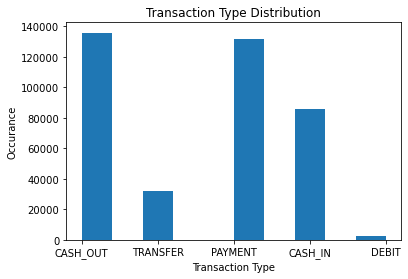

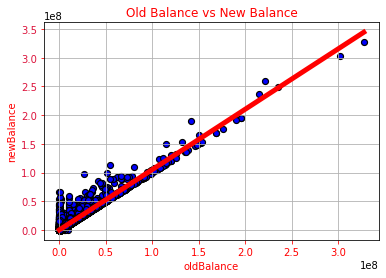

In [28]:
plot_utils.plot_histogram(type, "Transaction Type", "Transaction Type Distribution")
plot_utils.scatter_plot_helper(oldBalanceDest, newBalanceDest, "Old Balance vs New Balance", "oldBalance", "newBalance")